In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

In [10]:
data=pd.read_csv("/content/creditcard.csv")
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269312 entries, 0 to 269311
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    269312 non-null  float64
 1   V1      269312 non-null  float64
 2   V2      269311 non-null  float64
 3   V3      269311 non-null  float64
 4   V4      269311 non-null  float64
 5   V5      269311 non-null  float64
 6   V6      269311 non-null  float64
 7   V7      269311 non-null  float64
 8   V8      269311 non-null  float64
 9   V9      269311 non-null  float64
 10  V10     269311 non-null  float64
 11  V11     269311 non-null  float64
 12  V12     269311 non-null  float64
 13  V13     269311 non-null  float64
 14  V14     269311 non-null  float64
 15  V15     269311 non-null  float64
 16  V16     269311 non-null  float64
 17  V17     269311 non-null  float64
 18  V18     269311 non-null  float64
 19  V19     269311 non-null  float64
 20  V20     269311 non-null  float64
 21  V21     26

In [12]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,269312.000000,269312.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,...,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000
mean,90621.388824,-0.010451,-0.013635,0.042531,0.009667,-0.016733,0.007629,-0.007275,-0.000185,-0.000030,...,-0.000135,-0.003965,-0.002125,0.000994,0.008505,0.000901,-0.000274,0.000576,89.508776,0.001786
std,45402.770250,1.958071,1.657016,1.510119,1.416553,1.368071,1.325305,1.220179,1.191455,1.103989,...,0.736826,0.722291,0.630426,0.605956,0.518333,0.483388,0.399232,0.332613,248.032323,0.042224
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,52474.750000,-0.923973,-0.606981,-0.821875,-0.846105,-0.708698,-0.760788,-0.559317,-0.206423,-0.648997,...,-0.226757,-0.538128,-0.163023,-0.352310,-0.306628,-0.327997,-0.070712,-0.051982,5.990000,0.000000
50%,80906.000000,0.017067,0.059820,0.232991,-0.005032,-0.073544,-0.263559,0.030723,0.024317,-0.053643,...,-0.029772,0.004604,-0.013916,0.043295,0.031411,-0.054836,0.001610,0.012315,22.690000,0.000000
75%,134122.000000,1.294988,0.789316,1.059550,0.766358,0.591405,0.408930,0.559948,0.327413,0.601660,...,0.182679,0.516900,0.142849,0.437016,0.356320,0.243804,0.089674,0.077883,78.990000,0.000000
max,163624.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [13]:
data.shape


(269312, 31)

In [14]:
data.isnull().sum()


,0
Time,0
V1,0
V2,1
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [22]:
x=data.drop(['Class'],axis=1)
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [23]:

y=data['Class']
y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neighbor=KNeighborsClassifier(n_neighbors=5)



x_train_cleaned = x_train.dropna()
y_train_cleaned = y_train[x_train_cleaned.index]

neighbor.fit(x_train_cleaned, y_train_cleaned)

KNeighborsClassifier()

In [19]:
predictions=neighbor.predict(x_test)
print(predictions)

[0. 0. 0. ... 0. 0. 0.]


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, predictions)
ac=accuracy_score(y_test, predictions)
print(cm)

[[53754     0]
 [  102     7]]


Random Forest Accuracy: 0.9997029500770473

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     53773
         1.0       0.96      0.86      0.91        90

    accuracy                           1.00     53863
   macro avg       0.98      0.93      0.95     53863
weighted avg       1.00      1.00      1.00     53863



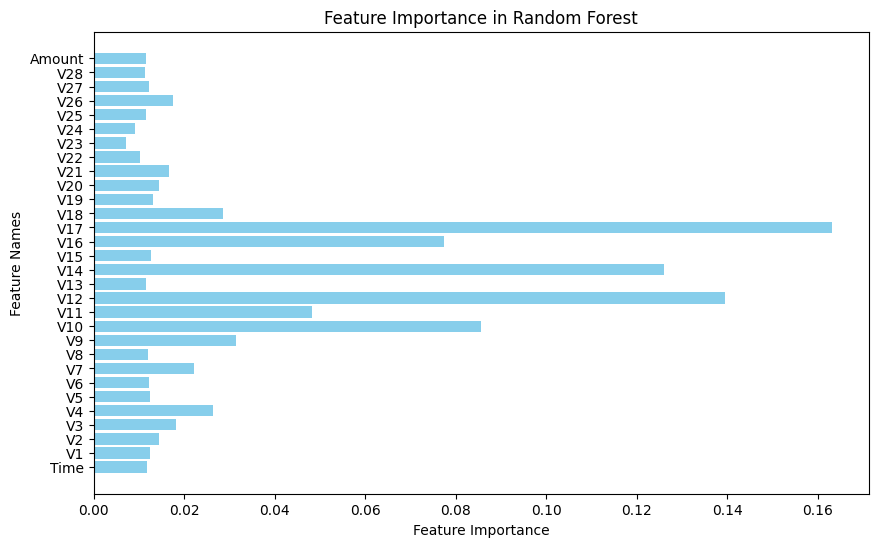

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = data.dropna()

x = data.drop(['Class'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Random Forest")
plt.show()


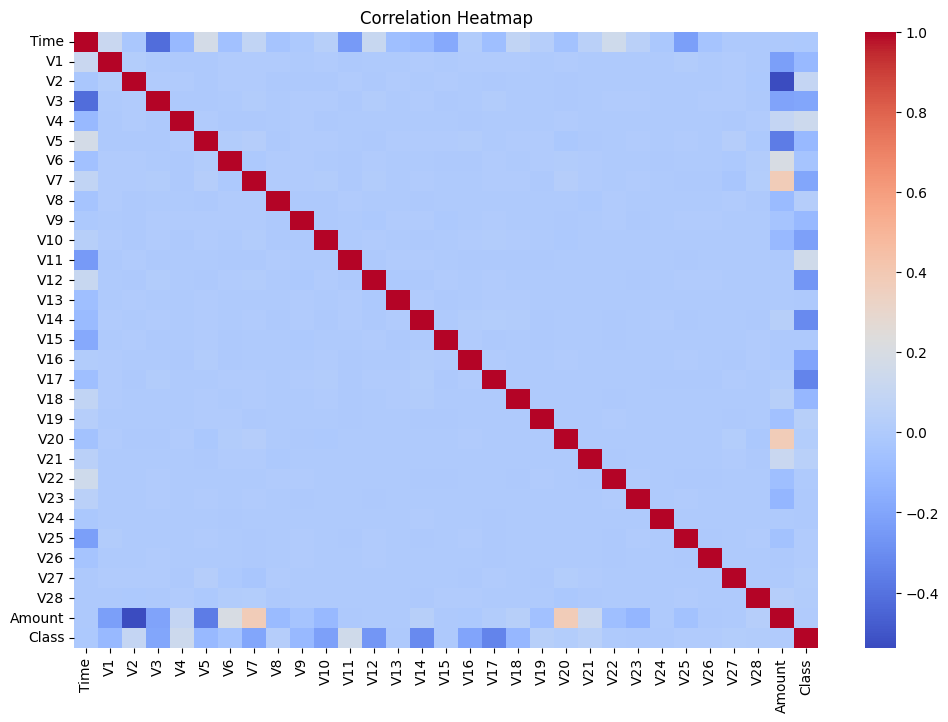

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


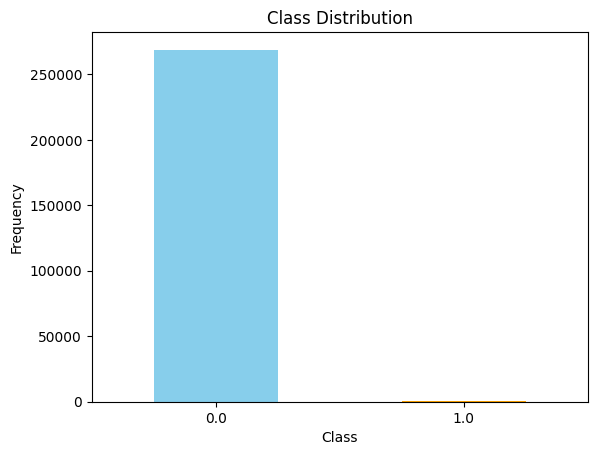

In [28]:
data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


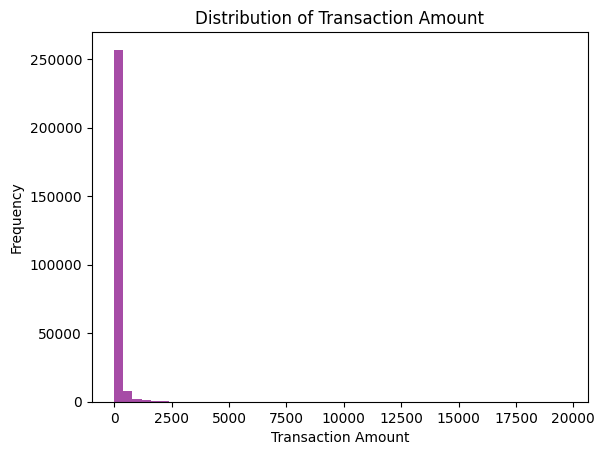

In [29]:
data['Amount'].plot(kind='hist', bins=50, color='purple', alpha=0.7)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


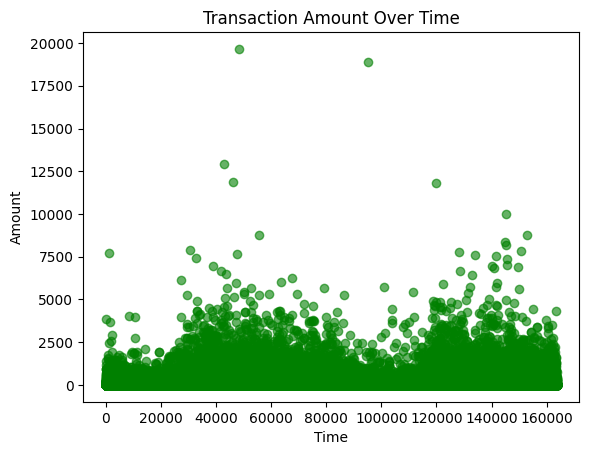

In [30]:
plt.scatter(data['Time'], data['Amount'], alpha=0.6, color='green')
plt.title("Transaction Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()


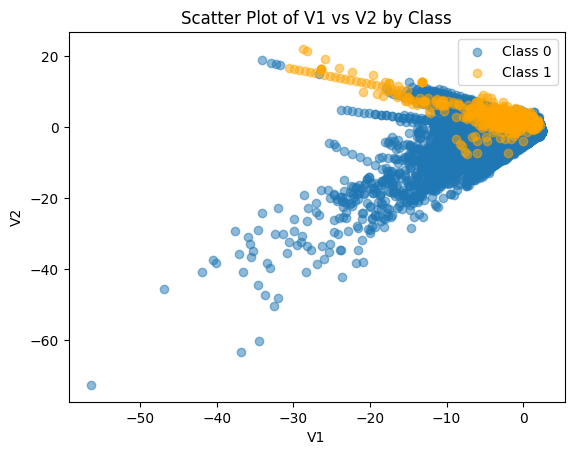

In [31]:
plt.scatter(data[data['Class'] == 0]['V1'], data[data['Class'] == 0]['V2'], label='Class 0', alpha=0.5)
plt.scatter(data[data['Class'] == 1]['V1'], data[data['Class'] == 1]['V2'], label='Class 1', alpha=0.5, color='orange')
plt.title("Scatter Plot of V1 vs V2 by Class")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()
plt.show()
